# Test data API and download data #1
240416

In [27]:
from datetime import datetime
# from pykrx import stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [28]:
df_rate = yf.download('USDKRW=X')
df_rate.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1197.300049,1203.500000,1195.000000,1198.400024,1198.400024,0
2003-12-02,1198.099976,1198.500000,1186.199951,1195.000000,1195.000000,0
2003-12-03,1195.000000,1198.400024,1192.500000,1192.500000,1192.500000,0
2003-12-04,1192.599976,1197.900024,1174.800049,1190.099976,1190.099976,0
2003-12-05,1189.400024,1193.800049,1178.599976,1184.699951,1184.699951,0


In [29]:
df_rate.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-13,1370.410034,1377.089966,1366.260010,1370.410034,1370.410034,0
2024-06-14,1373.739990,1386.859985,1374.670044,1373.739990,1373.739990,0
2024-06-17,1382.280029,1383.079956,1377.349976,1382.280029,1382.280029,0
2024-06-18,1379.060059,1385.250000,1377.979980,1379.060059,1379.060059,0
2024-06-19,1380.439941,1380.439941,1378.890015,1380.069946,1380.069946,0


In [30]:
df_rate.to_csv('./usdkrw.csv')

In [31]:
df_gold = yf.download('GC=F')
df_gold.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0


In [32]:
df_gold.to_csv('./gold.csv')

In [33]:
df_snp = yf.download('^GSPC')
df_snp.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [34]:
df_snp.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-12,5409.129883,5447.250000,5409.129883,5421.029785,5421.029785,3962840000
2024-06-13,5441.930176,5441.930176,5402.509766,5433.740234,5433.740234,3530380000
2024-06-14,5424.080078,5432.390137,5403.750000,5431.600098,5431.600098,3438650000
2024-06-17,5431.109863,5488.500000,5420.399902,5473.229980,5473.229980,3447840000
2024-06-18,5476.149902,5490.379883,5471.319824,5487.029785,5487.029785,3544330000


In [35]:
df_snp.to_csv('./snp.csv')

In [36]:
df_ko = yf.download('^KS11')
df_ko.to_csv('./kospi.csv')
df_ko.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-12-11,705.989990,709.479980,704.429993,704.679993,704.679993,28000
1996-12-12,705.109985,706.010010,688.739990,689.380005,689.380005,25900
1996-12-13,690.440002,695.719971,677.640015,689.070007,689.070007,26500
1996-12-16,686.969971,686.969971,667.710022,673.919983,673.919983,22800
1996-12-17,675.349976,680.090027,660.390015,663.349976,663.349976,31600


In [37]:
df_index = pd.concat([df_snp['Close'], df_ko['Close']], axis=1).loc['1996-12-11': , :]
df_index.columns = ['S&P', 'KOSPI']
df_index.head()

,S&P,KOSPI
Date,,
1996-12-11,740.729980,704.679993
1996-12-12,729.299988,689.380005
1996-12-13,728.640015,689.070007
1996-12-16,720.979980,673.919983
1996-12-17,726.039978,663.349976


In [38]:
df_snp.loc['1996-12-11':'1996-12-31', :]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-12-11,747.539978,747.539978,732.750000,740.729980,740.729980,494210000
1996-12-12,740.729980,744.859985,729.299988,729.299988,729.299988,492920000
1996-12-13,729.330017,731.400024,721.969971,728.640015,728.640015,458540000
1996-12-16,728.640015,732.679993,719.400024,720.979980,720.979980,447560000
1996-12-17,720.979980,727.669983,716.690002,726.039978,726.039978,519840000
1996-12-18,726.039978,732.760010,726.039978,731.539978,731.539978,500490000
1996-12-19,731.539978,746.059998,731.539978,745.760010,745.760010,526410000
1996-12-20,745.760010,755.409973,745.760010,748.869995,748.869995,654340000
1996-12-23,748.869995,750.400024,743.280029,746.919983,746.919983,343280000


In [39]:
df_sec = yf.download('005930.KS')
df_sec.to_csv('./sec.csv')
df_sec.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-13,78400.0,79000.0,77800.0,78600.0,78600.0,33763804
2024-06-14,79700.0,80500.0,79000.0,79600.0,79600.0,22926612
2024-06-17,79200.0,79500.0,78000.0,78100.0,78100.0,16123051
2024-06-18,78700.0,80200.0,78600.0,79800.0,79800.0,18207598
2024-06-19,81100.0,82500.0,80500.0,81200.0,81200.0,24168863


In [40]:
df_kospi = pd.read_csv('./kospi.csv')
df_sec = pd.read_csv('./sec.csv')
df_gold = pd.read_csv('./gold.csv')
df_snp = pd.read_csv('./snp.csv')
df_crate = pd.read_csv('./usdkrw.csv')

In [41]:
start_date = [df_crate.iloc[0, 0], df_gold.iloc[0, 0], df_kospi.iloc[0, 0], df_sec.iloc[0, 0], df_snp.iloc[0, 0]]
start_date

['2003-12-01', '2000-08-30', '1996-12-11', '2000-01-04', '1927-12-30']

In [42]:
df_list = [df_crate, df_gold, df_kospi, df_sec, df_snp]
df_names = ['currency', 'gold', 'kospi', 'sec', 'S&P']
for i, li in enumerate(df_list):
    li.rename(columns = {'Adj Close' : df_names[i]}, inplace = True)
    li['Date'] = pd.to_datetime(li['Date'])
    li.sort_values('Date', ascending=True, inplace=True)
    li.set_index('Date', inplace=True)
df = pd.concat([df_snp.loc['2003-12-01': , ['S&P']], df_crate.loc['2003-12-01':, ['currency']]], axis=1)
df = pd.concat([df.loc[: , :], df_gold.loc['2003-12-01':, ['gold']]], axis=1)
df = pd.concat([df.loc[: , :], df_kospi.loc['2003-12-01':, ['kospi']]], axis=1)
# df['kospi+1'] = df_kospi.loc['2003-12-02':, ['kospi']].values.reshape(-1)

# df.columns = ['S&P', 'currency', 'gold', 'kospi', 'kospi_nextday']
# df = pd.concat([df_snp, df_crate])
df.head()

,S&P,currency,gold,kospi
Date,,,,
2003-12-01,1070.119995,1198.400024,402.700012,807.390015
2003-12-02,1066.619995,1195.000000,403.700012,807.780029
2003-12-03,1064.729980,1192.500000,403.899994,808.340027
2003-12-04,1069.719971,1190.099976,403.299988,805.130005
2003-12-05,1061.500000,1184.699951,406.399994,789.409973


In [43]:
len(df_kospi.loc['2003-12-02':, ['kospi']].values.reshape(-1))

5073

In [44]:
df['kospi_shift'] = df_kospi['kospi'].shift(-1)
df.head()

,S&P,currency,gold,kospi,kospi_shift
Date,,,,,
2003-12-01,1070.119995,1198.400024,402.700012,807.390015,807.780029
2003-12-02,1066.619995,1195.000000,403.700012,807.780029,808.340027
2003-12-03,1064.729980,1192.500000,403.899994,808.340027,805.130005
2003-12-04,1069.719971,1190.099976,403.299988,805.130005,789.409973
2003-12-05,1061.500000,1184.699951,406.399994,789.409973,784.799988


In [45]:
df.isna().sum()

S&P            191
currency        31
gold           200
kospi          289
kospi_shift    290
dtype: int64

In [46]:
# in case of last value, check bfill after ffill
df.ffill(inplace=True)
df.bfill(inplace=True)

In [47]:
df.isna().sum()

S&P            0
currency       0
gold           0
kospi          0
kospi_shift    0
dtype: int64

In [48]:
df.to_csv('./total.csv')

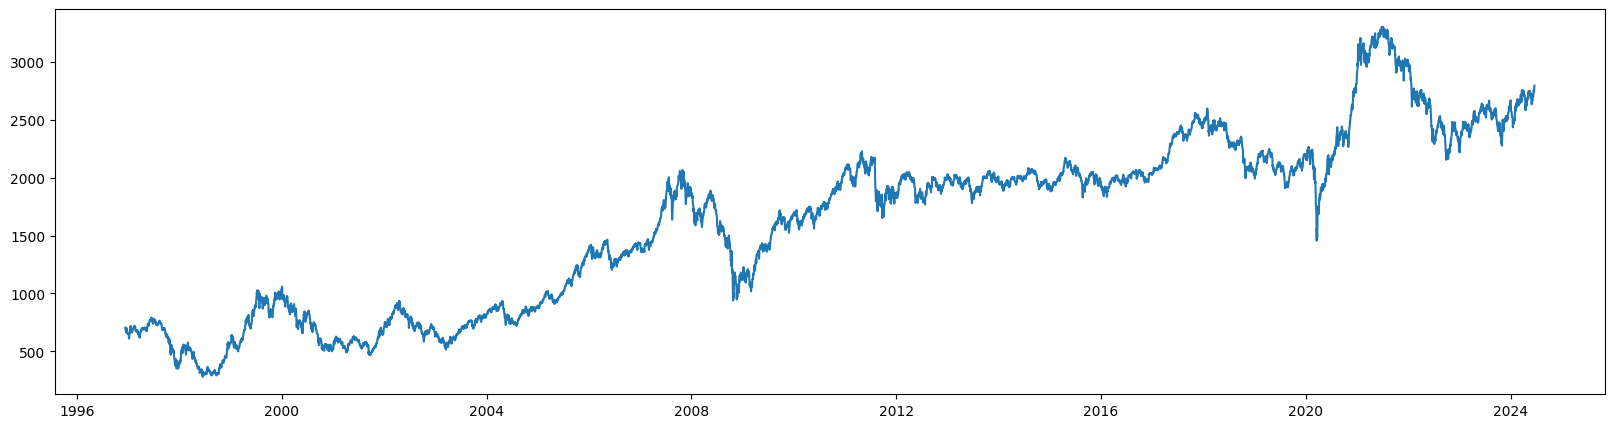

In [49]:
plt.figure(figsize=(20, 5))
plt.plot(df_kospi['Close'])
plt.show()

In [50]:
df_kospi.tail()

,Open,High,Low,Close,kospi,Volume
Date,,,,,,
2024-06-13,2764.179932,2776.719971,2752.610107,2754.889893,2754.889893,700000
2024-06-14,2759.219971,2769.159912,2750.860107,2758.419922,2758.419922,645000
2024-06-17,2754.830078,2759.860107,2741.030029,2744.100098,2744.100098,594000
2024-06-18,2765.699951,2772.350098,2759.030029,2763.919922,2763.919922,561500
2024-06-19,0.000000,0.000000,0.000000,2797.330078,2797.330078,0
